# Exploratory Data Analysis of Crude birth rates in UN member states

### Definition
According to the WHO, the Crude birth rate is the annual number of live births per 1,000 population.

### Method of measurement
The crude birth rate is generally computed as a ratio. The numerator is the number of live births observed in a population during a reference period and the denominator is the number of person-years lived by the population during the same period. It is expressed as births per 1,000 population.

### Birth Trends
Crude birth rates of more than 30 per 1,000 are considered high, and rates of less than 18 per 1,000 are considered low. The global crude birth rate in 2016 was 19 per 1,000.

In [1]:
import pandas as pd
import urllib.request
import zipfile

link = "https://api.worldbank.org/v2/en/indicator/SP.DYN.CBRT.IN?downloadformat=csv"

# urllib is used to access url files in zip formats and zipfile is used for unzipping the file
urllib.request.urlretrieve(link, "CBR.zip")
compressed_file = zipfile.ZipFile('CBR.zip')

csv_file = compressed_file.open('API_SP.DYN.CBRT.IN_DS2_en_csv_v2_4771185.csv')
data = pd.read_csv(csv_file, skiprows=4)

data.head(5)

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                         Indicator Name  Indicator Code       1960       1961  \
0  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  33.883000  32.831000   
1  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  47.438554  47.530552   
2  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  50.340000  50.443000   
3  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  47.325476  47.421051   
4  Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  51.026000  51.282000   

        1962       1963       1964       1965  ...       2013       2014  \
0  31.649000  30.416000  29.147000  27.889000  ...  13.316000  13.533000   
1  47.597558  47.636140  47.645480  47.667660  ...  36.447151  36.028330   
2  50.570000  50.703000  50.831000  50.872000  ...  39.601000  39.105000   
3  47.529223  47.531029  47.511923  47.468568  ...  39.856506  39.335352   
4  51.316000  51.323000  51.282000  51.282000  ...  43.282000  42.676000   

        2015       2016       2017       2018       2019       2020  2021  \
0  12.428000  12.300000  11.530000   9.881000   9.138000   8.102000   NaN   
1  35.613326  35.189027  34.892547  34.611033  34.341460  33.916755   NaN   
2  38.803000  37.936000  37.342000  36.927000  36.466000  36.051000   NaN   
3  38.859210  38.393100  37.881661  37.447087  37.027834  36.615730   NaN   
4  42.020000  41.377000  40.810000  40.236000  39.725000  39.271000   NaN   

   Unnamed: 66  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 67 columns]

In [2]:
# Accessing and exploring the metadata for useful information
meta_file = compressed_file.open('Metadata_Country_API_SP.DYN.CBRT.IN_DS2_en_csv_v2_4771185.csv')
metadata = pd.read_csv(meta_file)
# Show the metadata
metadata

Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa           Low income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, stretching from the Red Sea in t...   
2    The reporting period for national accounts dat...   
3    22 countries, stretching from the westernmost ...   
4    The World Bank systematically assesses the app...   
..                                                 ...   
260                                                NaN   
261  The World Bank systematically assesses the app...   
262  Fiscal year end: March 31; reporting period fo...   
263  National accounts data were rebased to reflect...   
264  National Accounts data are reported in Zimbabw...   

                       TableName  Unnamed: 5  
0                          Aruba         NaN  
1    Africa Eastern and Southern         NaN  
2                    Afghanistan         NaN  
3     Africa Western and Central         NaN  
4                         Angola         NaN  
..                           ...         ...  
260                       Kosovo         NaN  
261                  Yemen, Rep.         NaN  
262                 South Africa         NaN  
263                       Zambia         NaN  
264                     Zimbabwe         NaN  

[265 rows x 6 columns]

In [3]:
# Rename the column 'Country Name' to 'Country'
data.rename(columns = {'Country Name':'Country'}, inplace = True)

# Get the countries from the 'Country' column:
countries = data["Country"].unique()
print(F"Number of Countries: {len(countries)}")

# Show countries
print(countries)

Number of Countries: 266
['Aruba' 'Africa Eastern and Southern' 'Afghanistan'
 'Africa Western and Central' 'Angola' 'Albania' 'Andorra' 'Arab World'
 'United Arab Emirates' 'Argentina' 'Armenia' 'American Samoa'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas, The' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bermuda'
 'Bolivia' 'Brazil' 'Barbados' 'Brunei Darussalam' 'Bhutan' 'Botswana'
 'Central African Republic' 'Canada' 'Central Europe and the Baltics'
 'Switzerland' 'Channel Islands' 'Chile' 'China' "Cote d'Ivoire"
 'Cameroon' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros'
 'Cabo Verde' 'Costa Rica' 'Caribbean small states' 'Cuba' 'Curacao'
 'Cayman Islands' 'Cyprus' 'Czechia' 'Germany' 'Djibouti' 'Dominica'
 'Denmark' 'Dominican Republic' 'Algeria'
 'East Asia & Pacific (excluding high income)'
 'Early-demographic dividend' 'East Asia & Pacific'
 'Europe & Central Asia (exclu

Exploring our data and metadata revealed that there are additional data that cannot be considered as UN member states (eg. Africa Eastern and Southern, World). As these are not recognized countries, we'll have to filter our data as much as we can to only recognized coutries.

In [4]:
# Let's check the overview of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            247 non-null    float64
 5   1961            246 non-null    float64
 6   1962            247 non-null    float64
 7   1963            246 non-null    float64
 8   1964            246 non-null    float64
 9   1965            246 non-null    float64
 10  1966            247 non-null    float64
 11  1967            246 non-null    float64
 12  1968            246 non-null    float64
 13  1969            246 non-null    float64
 14  1970            250 non-null    float64
 15  1971            248 non-null    float64
 16  1972            249 non-null    float64
 17  1973            250 non-null    flo

In [5]:
# First, we'll get rid of columns that are empty and those that not needed for our analysis
data.drop(['Country Code','Indicator Name','Indicator Code', '2021', 'Unnamed: 66'],axis=1, inplace=True)

data.head()

Country       1960       1961       1962       1963  \
0                        Aruba  33.883000  32.831000  31.649000  30.416000   
1  Africa Eastern and Southern  47.438554  47.530552  47.597558  47.636140   
2                  Afghanistan  50.340000  50.443000  50.570000  50.703000   
3   Africa Western and Central  47.325476  47.421051  47.529223  47.531029   
4                       Angola  51.026000  51.282000  51.316000  51.323000   

        1964       1965       1966       1967       1968  ...       2011  \
0  29.147000  27.889000  26.663000  25.503000  24.592000  ...  12.246000   
1  47.645480  47.667660  47.697885  47.691330  47.691022  ...  37.483987   
2  50.831000  50.872000  50.986000  51.081000  51.148000  ...  39.855000   
3  47.511923  47.468568  47.443637  47.425928  47.422346  ...  40.894235   
4  51.282000  51.282000  51.295000  51.314000  51.348000  ...  44.364000   

        2012       2013       2014       2015       2016       2017  \
0  12.723000  13.316000  13.533000  12.428000  12.300000  11.530000   
1  36.921300  36.447151  36.028330  35.613326  35.189027  34.892547   
2  40.009000  39.601000  39.105000  38.803000  37.936000  37.342000   
3  40.416431  39.856506  39.335352  38.859210  38.393100  37.881661   
4  43.860000  43.282000  42.676000  42.020000  41.377000  40.810000   

        2018       2019       2020  
0   9.881000   9.138000   8.102000  
1  34.611033  34.341460  33.916755  
2  36.927000  36.466000  36.051000  
3  37.447087  37.027834  36.615730  
4  40.236000  39.725000  39.271000  

[5 rows x 62 columns]

In [6]:
# In the next step, we'll get rid of countries that are not recognized UN member states

# Defining a function for deleting rows by their column names
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

# Operation for deleting our unwanted rows
data = filter_rows_by_values(data, "Country", ['Africa Eastern and Southern', 'Africa Western and Central', 'Arab World',
                                                'Central Europe and the Baltics', 'East Asia & Pacific',
                                                'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 
                                                'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 
                                                'Euro area', 'European Union', 'Fragile and conflict affected situations', 
                                                'High income', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 
                                                'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified', 
                                                'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification',
                                                'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend', 
                                                'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)', 
                                                'North America', 'OECD members', 'Other small states', 'Pre-demographic dividend', 
                                                'Pacific island small states', 'Post-demographic dividend', 'South Asia', 'Small states', 
                                                'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 
                                                'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 
                                                'Latin America & the Caribbean (IDA & IBRD countries)', 'Middle East & North Africa (IDA & IBRD countries)', 
                                                'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)',
                                                'Upper middle income', 'World'])
data

Country    1960    1961    1962    1963    1964    1965    1966  \
0           Aruba  33.883  32.831  31.649  30.416  29.147  27.889  26.663   
2     Afghanistan  50.340  50.443  50.570  50.703  50.831  50.872  50.986   
4          Angola  51.026  51.282  51.316  51.323  51.282  51.282  51.295   
5         Albania  41.068  40.332  39.216  38.149  36.825  35.362  34.356   
6         Andorra     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
..            ...     ...     ...     ...     ...     ...     ...     ...   
261        Kosovo  41.129  40.947  40.708  40.430  39.515  38.466  37.501   
262   Yemen, Rep.  54.408  54.704  54.784  54.943  55.318  55.422  55.646   
263  South Africa  39.520  39.911  39.963  40.028  40.072  40.014  39.972   
264        Zambia  49.929  50.026  50.064  50.037  49.959  49.852  49.747   
265      Zimbabwe  47.260  47.039  46.867  46.611  46.398  46.246  46.058   

       1967    1968  ...    2011    2012    2013    2014    2015    2016  \
0    25.503  24.592  ...  12.246  12.723  13.316  13.533  12.428  12.300   
2    51.081  51.148  ...  39.855  40.009  39.601  39.105  38.803  37.936   
4    51.314  51.348  ...  44.364  43.860  43.282  42.676  42.020  41.377   
5    33.898  33.512  ...  12.035  12.227  12.279  12.150  11.718  11.289   
6       NaN     NaN  ...     NaN   9.500     NaN     NaN     NaN   8.800   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
261  37.772  37.705  ...  16.312  16.399  17.061  14.950  13.614  12.848   
262  55.724  55.527  ...  35.490  35.125  34.794  34.428  33.933  33.348   
263  39.947  39.778  ...  22.282  22.353  22.177  22.057  21.300  20.250   
264  49.660  49.675  ...  41.162  40.352  39.507  38.584  37.832  37.242   
265  45.949  45.949  ...  37.205  36.804  36.246  35.122  33.960  33.171   

       2017    2018    2019    2020  
0    11.530   9.881   9.138   8.102  
2    37.342  36.927  36.466  36.051  
4    40.810  40.236  39.725  39.271  
5    10.870  10.517  10.343  10.285  
6       NaN   7.200   7.000     NaN  
..      ...     ...     ...     ...  
261  12.615  12.094  11.443  11.181  
262  32.713  32.305  31.778  31.252  
263  20.643  21.137  21.276  20.326  
264  36.601  36.040  35.462  34.953  
265  32.516  32.074  31.518  31.009  

[219 rows x 62 columns]

In [7]:
# Getting an overview of rows with NaN values
data[data.isna().any(axis=1)]

Country  1960  1961  1962  1963  1964  1965  1966  \
6                      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11              American Samoa   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
27                     Bermuda  28.3   NaN  26.0   NaN   NaN   NaN  20.3   
51                     Curacao   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
52              Cayman Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
57                    Dominica   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
78               Faroe Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91                   Greenland   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
125        St. Kitts and Nevis   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
149                     Monaco   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
155           Marshall Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
164   Northern Mariana Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
179                      Nauru   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
188                      Palau   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
196         West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
212                 San Marino   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
214                     Serbia   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
225  Sint Maarten (Dutch part)   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
226                 Seychelles   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     1967  1968  ...    2011    2012    2013    2014    2015    2016    2017  \
6     NaN   NaN  ...     NaN   9.500     NaN     NaN     NaN   8.800     NaN   
11    NaN   NaN  ...     NaN     NaN     NaN  17.500     NaN     NaN  16.600   
27    NaN   NaN  ...  10.600  10.400  10.500   9.300   9.400   9.300   9.000   
51    NaN   NaN  ...  13.100  13.400  12.700  12.600  11.900  11.200   9.700   
52    NaN   NaN  ...  14.500  13.600  12.500  12.500  11.000  10.800   9.900   
57    NaN   NaN  ...     NaN     NaN     NaN  12.000     NaN     NaN   9.600   
78    NaN   NaN  ...  12.000  12.900  13.000  13.200  12.400  13.600  13.100   
91    NaN   NaN  ...  14.400  13.900  14.500  14.300  15.200  14.800  15.200   
125   NaN   NaN  ...     NaN     NaN     NaN  13.400     NaN     NaN     NaN   
149   NaN   NaN  ...     NaN     NaN     NaN     NaN   8.100   7.800     NaN   
155   NaN   NaN  ...  31.000     NaN     NaN     NaN     NaN     NaN     NaN   
164   NaN   NaN  ...     NaN     NaN     NaN  20.500     NaN     NaN     NaN   
179   NaN   NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
188   NaN   NaN  ...  11.800  15.300  13.000  13.700  13.700  12.000  12.400   
196   NaN   NaN  ...  33.382  32.894  32.521  32.477  32.726  31.921  30.973   
212   NaN   NaN  ...  10.000   8.700   9.700   9.100   8.200   7.900   6.700   
214   NaN   NaN  ...   9.100   9.300   9.200   9.300   9.300   9.200   9.200   
225   NaN   NaN  ...  12.900  12.000  14.000  14.100     NaN     NaN   9.000   
226   NaN   NaN  ...  18.600  18.600  17.400  17.000  17.000  17.400  17.200   

       2018    2019  2020  
6     7.200   7.000   NaN  
11      NaN     NaN  12.7  
27    8.300   8.200   8.4  
51   10.500  10.100  10.1  
52    9.900   9.800  12.6  
57      NaN     NaN   NaN  
78   13.400  13.200  12.9  
91   14.600  15.100  14.8  
125     NaN  12.400   NaN  
149   5.900     NaN   NaN  
155     NaN     NaN   NaN  
164     NaN  13.200   NaN  
179     NaN     NaN   NaN  
188  14.000  11.200  11.0  
196  30.126  29.466  28.8  
212   6.800   6.700   6.4  
214   9.200   9.300   8.9  
225     NaN     NaN   NaN  
226  17.100  16.400  15.8  

[19 rows x 62 columns]

In [8]:
# Getting rid of rows with NAN values
data_slice = data.dropna()

# Rearranging the index
data_slice.index = range(len(data_slice.index))
data_slice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  200 non-null    object 
 1   1960     200 non-null    float64
 2   1961     200 non-null    float64
 3   1962     200 non-null    float64
 4   1963     200 non-null    float64
 5   1964     200 non-null    float64
 6   1965     200 non-null    float64
 7   1966     200 non-null    float64
 8   1967     200 non-null    float64
 9   1968     200 non-null    float64
 10  1969     200 non-null    float64
 11  1970     200 non-null    float64
 12  1971     200 non-null    float64
 13  1972     200 non-null    float64
 14  1973     200 non-null    float64
 15  1974     200 non-null    float64
 16  1975     200 non-null    float64
 17  1976     200 non-null    float64
 18  1977     200 non-null    float64
 19  1978     200 non-null    float64
 20  1979     200 non-null    float64
 21  1980     200 non

In [9]:
# As we've been able to get rid of unrecognized countries and countries with NaN values, we can move forward with 
# visualizing our data

from matplotlib import pyplot as plt
%matplotlib inline

# Reshaping the data for better manipulation
reshaped_data = pd.melt(data_slice, id_vars=["Country"], var_name="Year")

# Assigning a descriptive name to the column for our values
reshaped_data.rename(columns = {'value':'Crude birth rate'}, inplace = True)
reshaped_data.head(5)

Country  Year  Crude birth rate
0                 Aruba  1960            33.883
1           Afghanistan  1960            50.340
2                Angola  1960            51.026
3               Albania  1960            41.068
4  United Arab Emirates  1960            41.814

In [10]:
# Checking the overview...
reshaped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           12200 non-null  object 
 1   Year              12200 non-null  object 
 2   Crude birth rate  12200 non-null  float64
dtypes: float64(1), object(2)
memory usage: 286.1+ KB


In [11]:
# As the year column is now an object dtype, we need it as a datetime dtype
reshaped_data["Year"] = pd.to_datetime(reshaped_data["Year"])
reshaped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Country           12200 non-null  object        
 1   Year              12200 non-null  datetime64[ns]
 2   Crude birth rate  12200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 286.1+ KB


<AxesSubplot: xlabel='Year'>

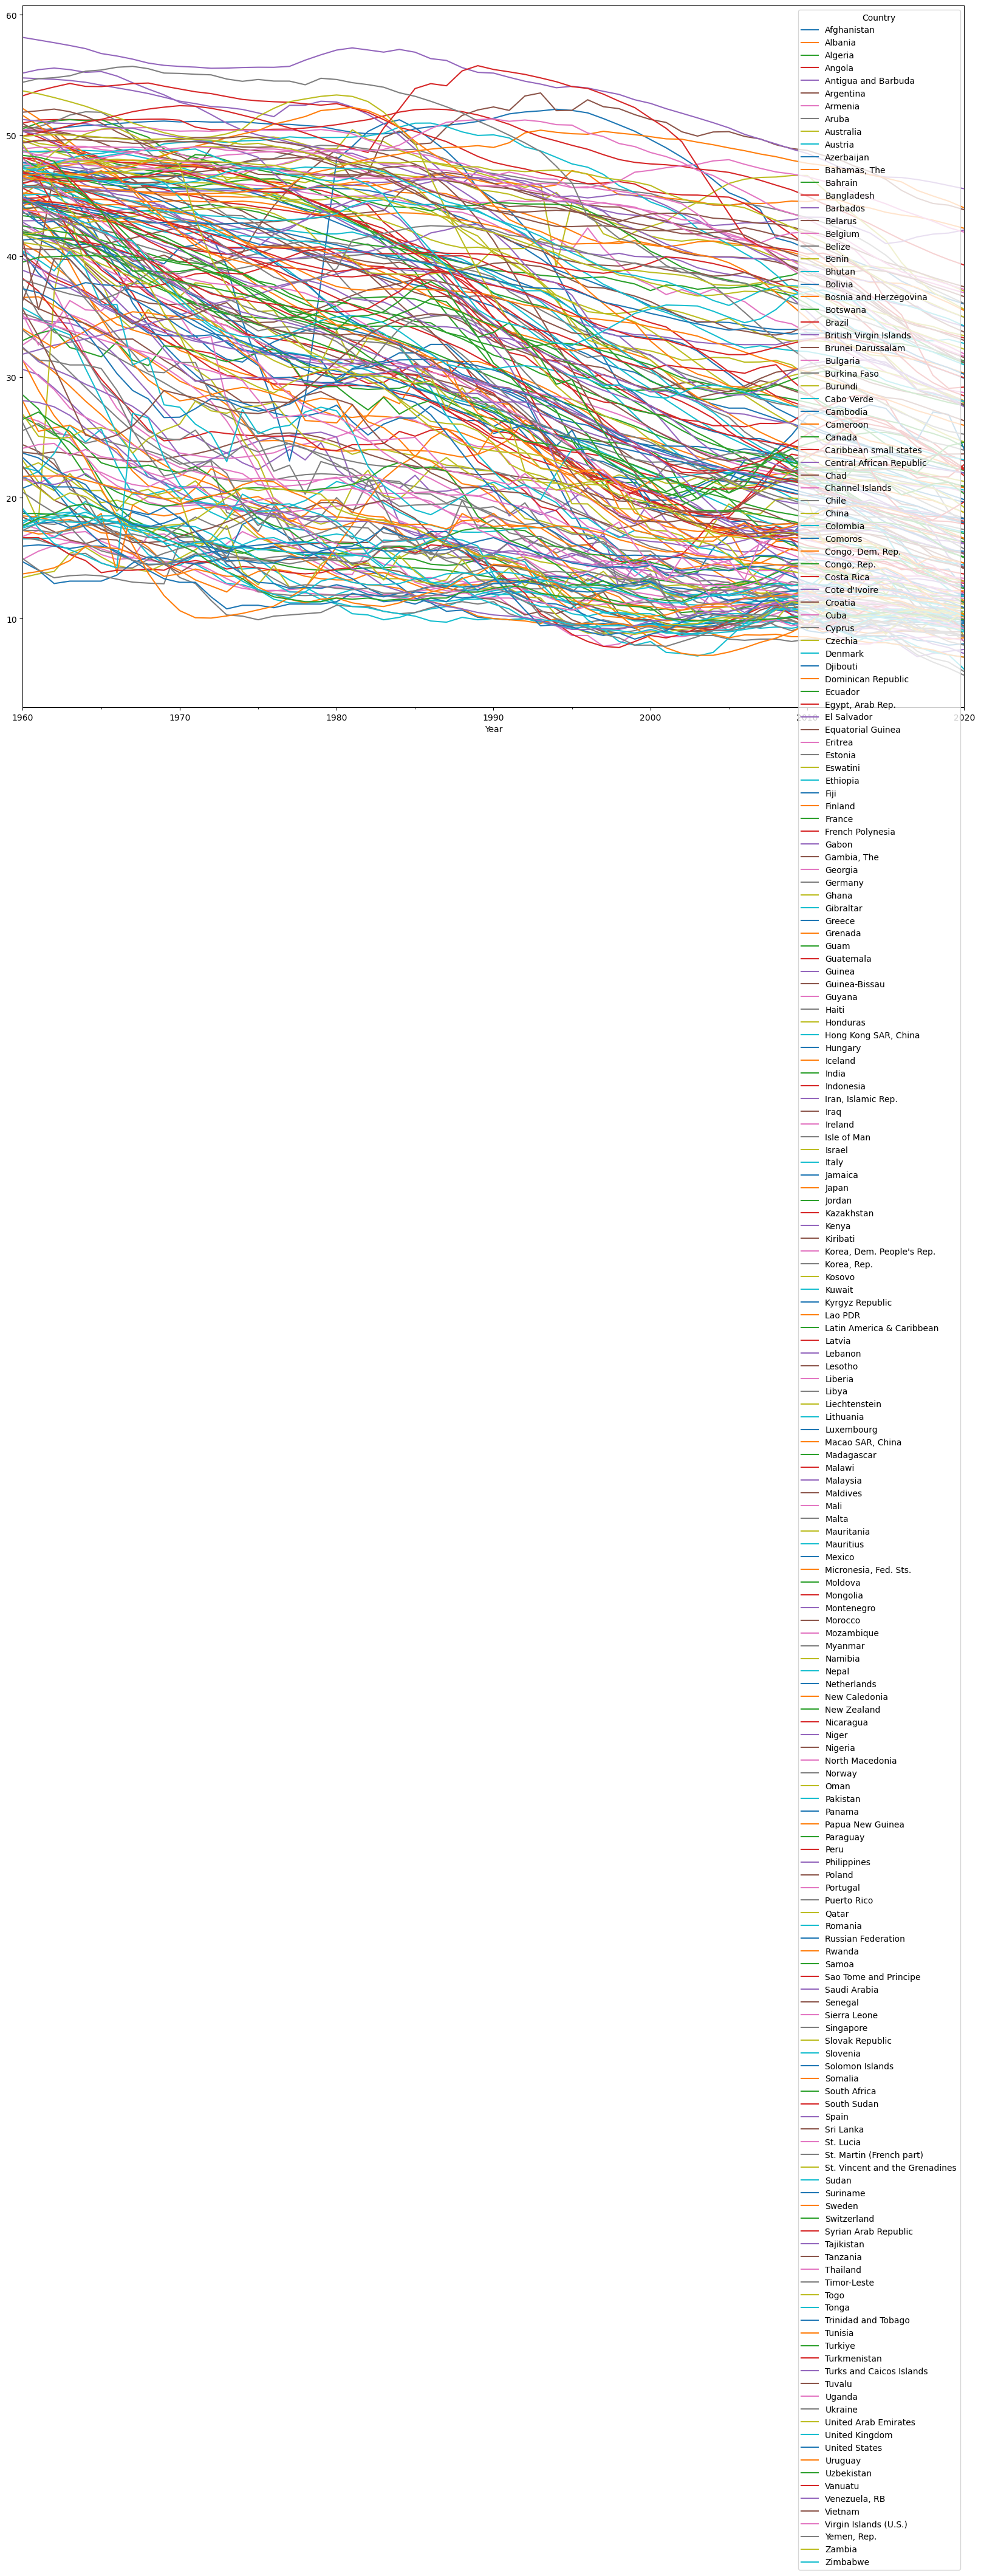

In [12]:
drawing = pd.pivot_table(reshaped_data, index='Year', columns='Country', values='Crude birth rate')

drawing.plot(figsize=(20,15), grid=False)

As this is a very poor visualization, we'll explore better ways to visualize our data using a small-multiples line charts

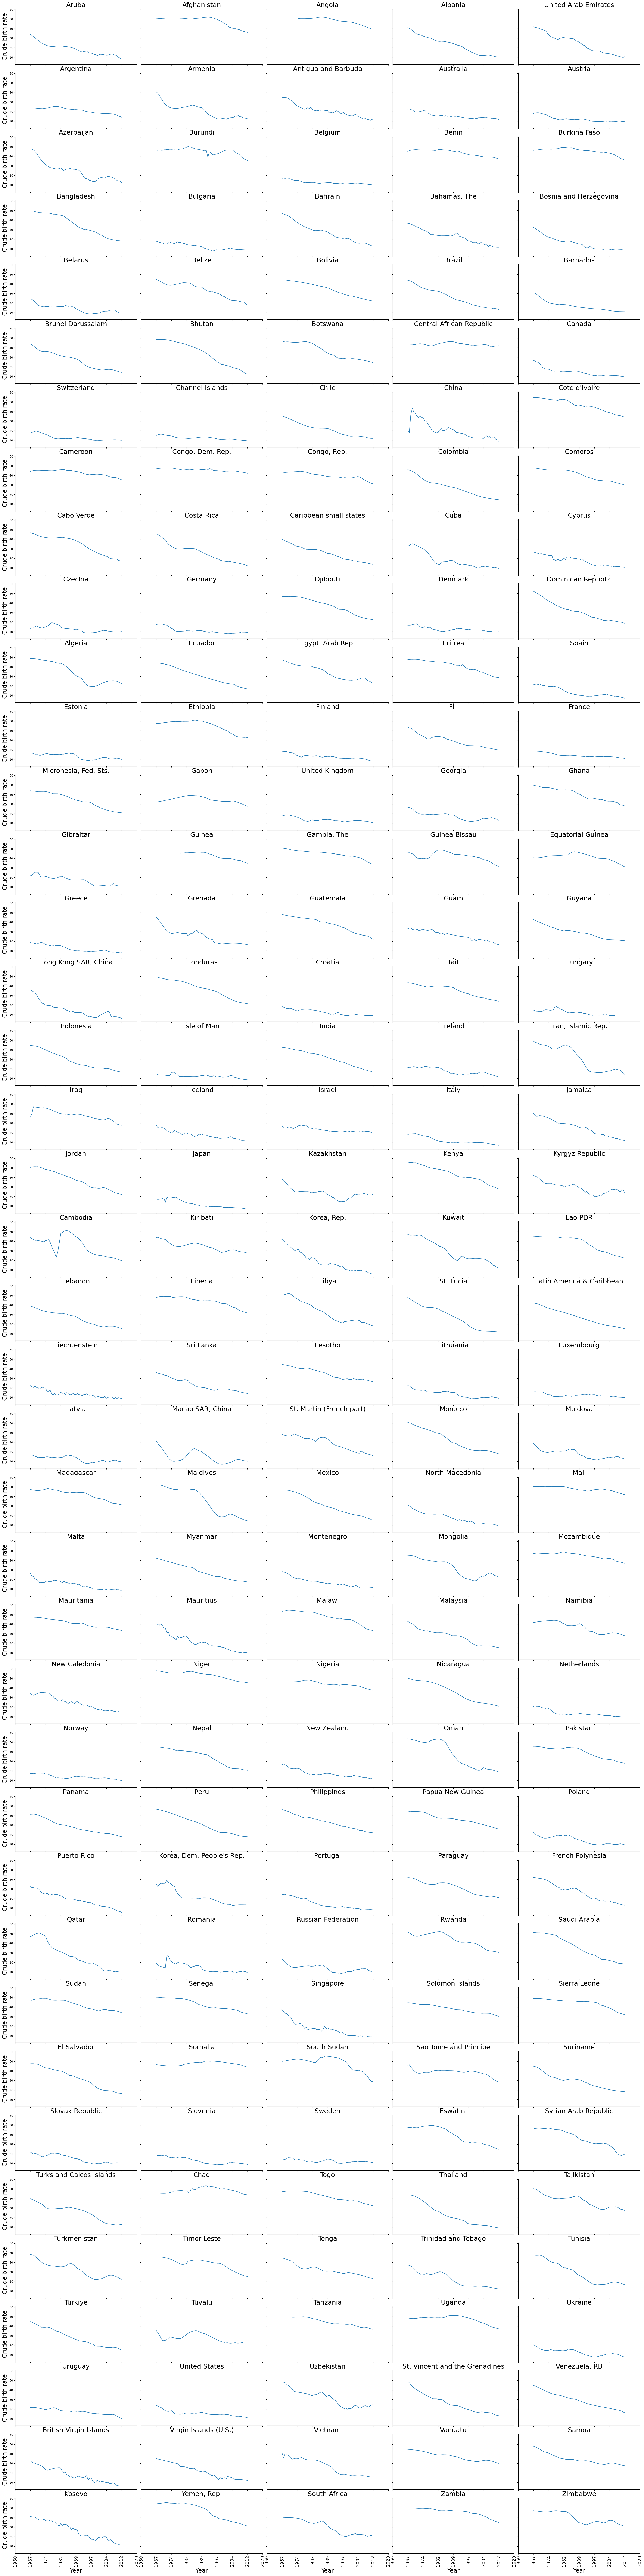

In [13]:
# Seaborn for plotting and styling
import seaborn as sns

sm = sns.FacetGrid(reshaped_data, col="Country", col_wrap=5, height=3, aspect=2, margin_titles=True)
sm = sm.map(plt.plot, "Year", "Crude birth rate")
# And now format the plots with appropriate titles and font sizes

sm.set_titles("{col_name}", size=22).set_ylabels(size=20).set_xlabels(size=20)
datelist = pd.date_range(start="1960", end="2020", periods=9).to_period('Y').tolist()
sm.set_xticklabels(datelist, size=15, rotation=90)

In [14]:
# Import our GeoPandas library
import geopandas as gpd

shape_data = gpd.GeoDataFrame.from_file("./World Map/")
# Show the shape_data
shape_data.head()

name                                           geometry
0           Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...
1                Angola  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...
2               Albania  POLYGON ((20.59025 41.85540, 20.46317 41.51509...
3  United Arab Emirates  POLYGON ((51.57952 24.24550, 51.75744 24.29407...
4             Argentina  MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...

In [15]:
shape_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      180 non-null    object  
 1   geometry  180 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 2.9+ KB


According to the United nations official website, there are 193 UN member states. According to our available data resource for the world map, polygons for 180 countries are available. Therefore, we'll be limiting our analysis to the countries with available data or data available for both datasets

Also, there are contrasting spellings and names for the various countries in both dataset. We can view this if we look for the differences between the two dataframes we need to merge

In [16]:
map_countries = shape_data.name.unique()
data_countries = reshaped_data.Country.unique()

name_list = list(set(data_countries) - set(map_countries))
name_list.sort()
print(len(name_list))
print(name_list)

name_list = list(set(map_countries) - set(data_countries))
name_list.sort()
print(len(name_list))
print(name_list)

57
['Antigua and Barbuda', 'Aruba', 'Bahamas, The', 'Bahrain', 'Barbados', 'British Virgin Islands', 'Brunei Darussalam', 'Cabo Verde', 'Caribbean small states', 'Channel Islands', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Czechia', 'Egypt, Arab Rep.', 'Eswatini', 'French Polynesia', 'Gambia, The', 'Gibraltar', 'Grenada', 'Guam', 'Guinea-Bissau', 'Hong Kong SAR, China', 'Iran, Islamic Rep.', 'Isle of Man', 'Kiribati', "Korea, Dem. People's Rep.", 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Latin America & Caribbean', 'Liechtenstein', 'Macao SAR, China', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'North Macedonia', 'Russian Federation', 'Samoa', 'Sao Tome and Principe', 'Singapore', 'Slovak Republic', 'St. Lucia', 'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Syrian Arab Republic', 'Tanzania', 'Timor-Leste', 'Tonga', 'Turkiye', 'Turks and Caicos Islands', 'Tuvalu', 'United States', 'Venezuela, RB', 'Virgin Islands (U.S.)', 'Yemen, Rep.']
3

Now that we can better visualize the differences in the country names of both our dataframes, we can go ahead to rename it so that they match before we merge to form chloropleths

In [17]:
fix = {"United States of America": ["United States"], "Yemen": ["Yemen, Rep"], "The Bahamas": ["Bahamas, The"],
       "Czech Republic": ["Czechia"], "Egypt": ["Egypt, Arab Rep."], "Gambia": ["Gambia, The"],
       "Guinea Bissau": ["Guinea-Bissau"], "Iran": ["Iran, Islamic Rep"], "Brunei": ["Brunei Darussalam"],
       "East Timor": ["Timor-Leste"], "Ivory Coast": ["Cote d'Ivoire"], "Kyrgyzstan": ["Kyrgyz Republic"],
       "Laos": ["Lao PDR"], "Macedonia": ["North Macedonia"], "North Korea": ["Korea, Dem. People's Rep."],
       "Democratic Republic of the Congo": ["Congo, Dem. Rep."], "Russia": ["Russian Federation"], "South Korea": ["Korea, Rep."],
       "Slovakia": ["Slovak Republic"], "Swaziland": ["Eswatini"], "Syria": ["Syrian Arab Republic"],
       "Turkey": ["Turkiye"], "United Republic of Tanzania": ["Tanzania"], "Venezuela": ["Venezuela, RB"],
       "Republic of the Congo": ["Congo, Rep."]
      }


In [18]:
# Defining a function that combines these terms into one agreed-upon term
def fix_countries(data, fix_countries):

    # Create an empty list for each of the new dataframes we'll create
    new_frames = []
    # And an empty list for all the governorates we'll need to remove later
    remove = []
    # Create our list of dates
    date_list = data["Year"].unique()
    # Loop through each of the governorates we need to fix
    for key in fix_countries.keys():
        # Create a filtered dataframe containing only the governorates to fix
        ds = data.loc[data.Country.isin(fix_countries[key])]
        # New entries for the new dataframe
        new_rows = {"Year": [],
                    "Crude birth rate": []
                   }
        # Divisor for averages (i.e. there could be more than 2 countries to fix)
        num = len(fix_countries[key])
        # Add the governorate values to the remove list
        remove.extend(fix_countries[key])
        # For each year, generate new values
        for d in date_list:
            # Data in the dataframe is stored as a Timestamp value
            r = ds[ds["Year"] == pd.Timestamp(d)]
            new_rows["Year"].append(pd.Timestamp(d))
            new_rows["Crude birth rate"].append(r["Crude birth rate"].sum()/num)
        # Create a new dataframe from the combined data
        new_rows = pd.DataFrame(new_rows)
        # And assign the values to the key Country
        new_rows["Country"] = key
        # Add the new dataframe to our list of new frames
        new_frames.append(new_rows)
    # Get an inverse filtered dataframe from what we had before
    ds = data.loc[~data.Country.isin(remove)]
    new_frames.append(ds)
    # Return a new contatenated dataframe with all our corrected data
    return pd.concat(new_frames, ignore_index=True)

In [19]:
# Calling our function on our data
reshaped_data = fix_countries(reshaped_data, fix).set_index("Country")
reshaped_data.tail()

Year  Crude birth rate
Country                                  
Kosovo       2020-01-01            11.181
Yemen, Rep.  2020-01-01            31.252
South Africa 2020-01-01            20.326
Zambia       2020-01-01            34.953
Zimbabwe     2020-01-01            31.009

In [20]:
# Calling our filter function to remove rows with missing data on our shape_data
shape_data = filter_rows_by_values(shape_data, "name", ['Antartica', 'Bermuda', 'Northern Cyprus', 'Falkland Islands', 
                                                        'French Guiana', 'Republic of Serbia', 'Somaliland',
                                                        'French Southern and Antarctic Lands', 'Greenland', 
                                                        'Taiwan', 'West Bank', 'Western Sahara'])
shape_data["name"].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Antarctica', 'Bangladesh', 'Bulgaria',
       'Bosnia and Herzegovina', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'The Bahamas',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Brunei', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'Republic of the Congo', 'Colombia', 'Costa Rica',
       'China', 'Ivory Coast', 'Cameroon',
       'Democratic Republic of the Congo', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Macedonia',
       'Guinea', 'Gambia', 'Guinea Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'Guyana', 'Slovakia', 'Honduras', 'Croatia', 'Hait

<AxesSubplot: >

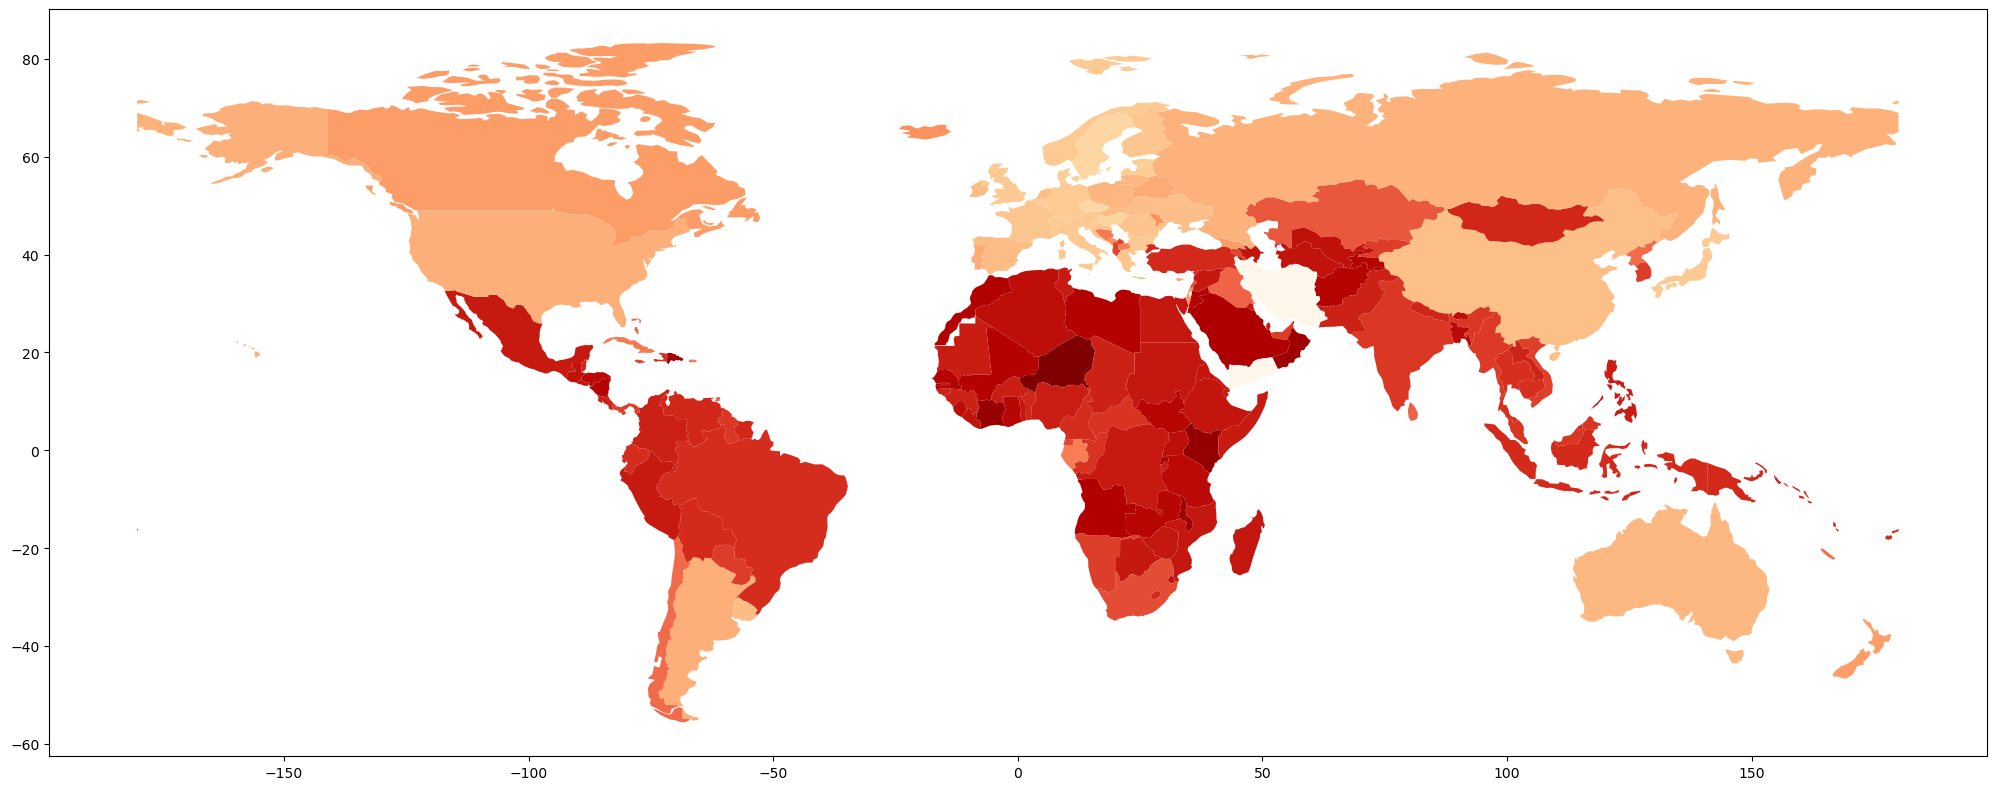

In [21]:
# And now we can merge our existing reshaped_data to produce our map data
map_data = pd.merge(shape_data, reshaped_data, how="outer", left_on="name", right_on="Country", indicator=False)

# Let's draw a map

# First, define a figure, axis and plot size
fig, ax = plt.subplots(figsize=(25,14))

# We'll look at one specific date, the first entry in the series
md = map_data.loc[map_data.Year == "1960"]
# And plot 
md.plot(ax=ax, column='Crude birth rate', cmap='OrRd')

Here we find a fundamental limit of our map. It would be nice to show a time-series of how events progressed. In the next step, we'll be creating a small multiple map to demonstrate how crude birth rates progressed over the years.

C:\Users\agoze\zero2mastery\sample_project\env\lib\site-packages\geopandas\plotting.py:484: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


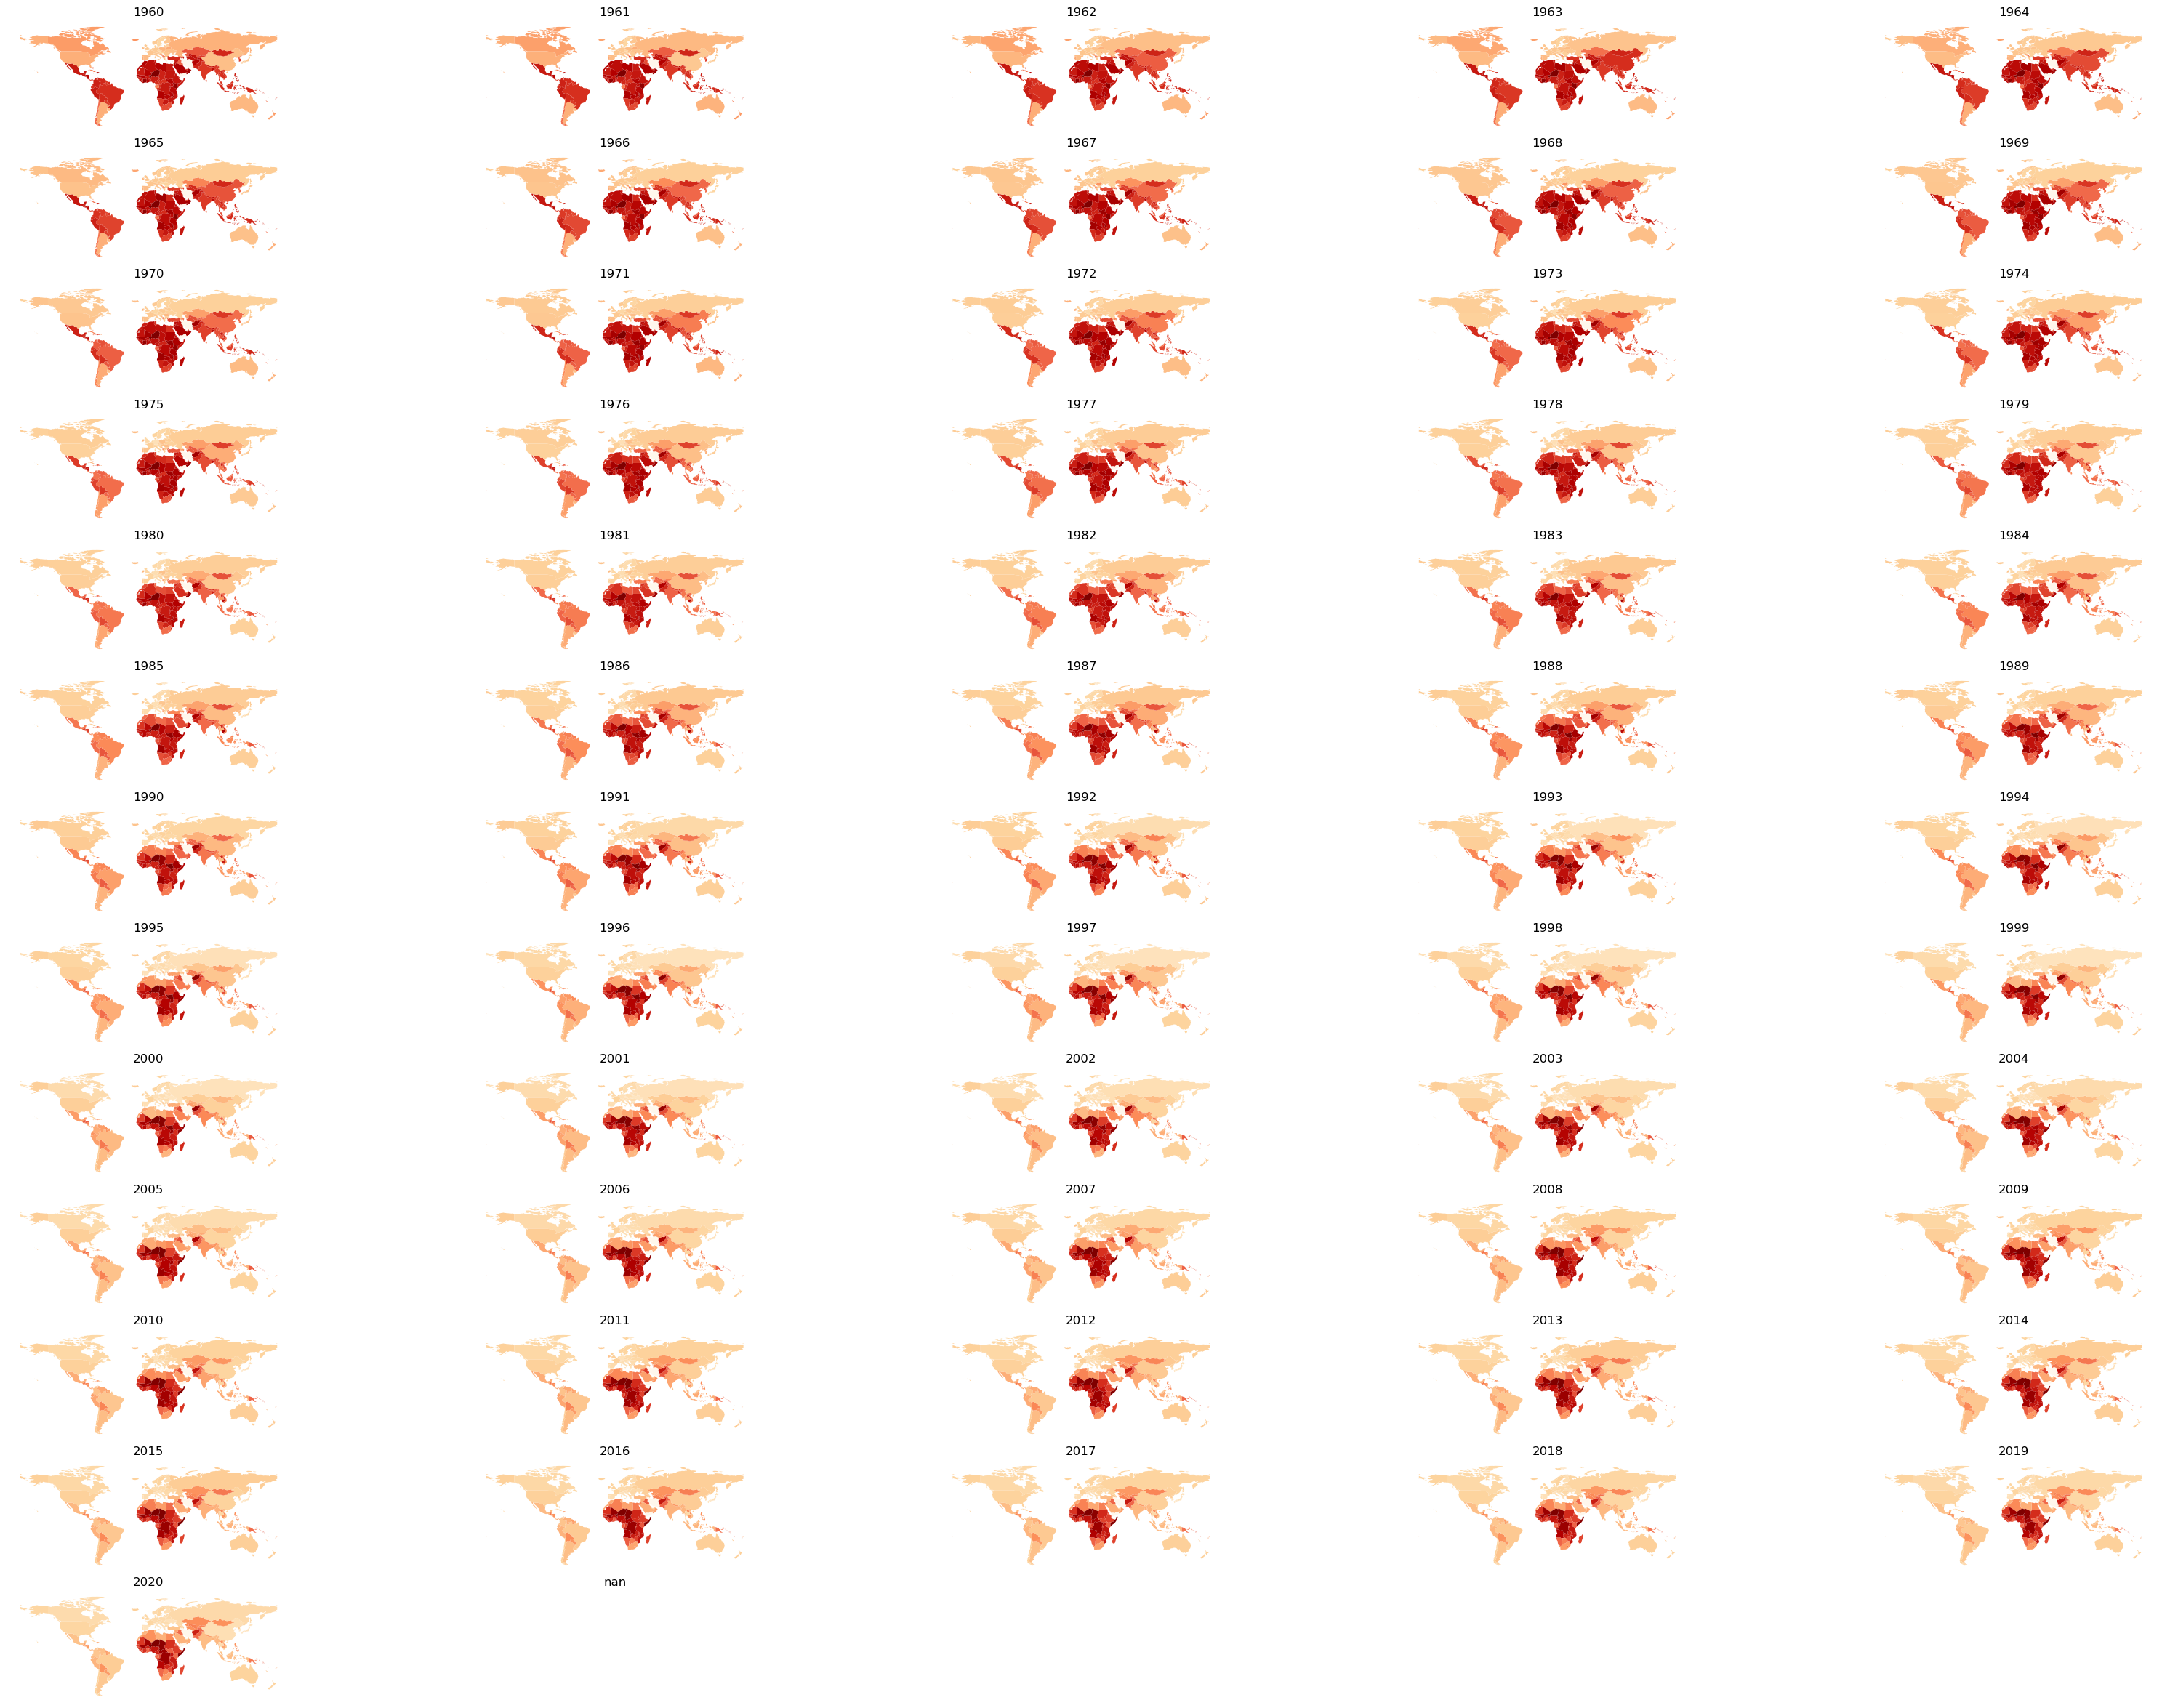

In [22]:
# Create a datetime format data series
date_list = pd.Series([pd.Timestamp(d) for d in map_data["Year"].unique()])
# Sort dates in place
date_list.sort_values(inplace = True)
dl = {}
for d in date_list:
    # A mechanism to get the last day of each year-month
    k = "{}".format(d.year)
    dl[k] = d
# Recover and sort the unique list of dates
date_list = list(dl.values())
date_list.sort()

# Create our figure
fig = plt.figure(figsize=(40, 30))
# Set two check_sums, first_date and sub_count
first_date = 0
sub_count = 1
# Loop through the dates, using "enumerate" to count the number of times we loop
for i, d in enumerate(date_list):
    # Convert the Numpy time format to a simpler Python format
    check_date = pd.Timestamp(d).to_pydatetime()
    # Check if we've seen this year before
    if check_date.year == first_date:
        # If we have, check if it's the last value in the loop
        if i < len(date_list)-1:
            # And skip the rest of this loop
            continue
    # Store the month we've just reached
    first_date = check_date.year
    # Get a dataframe for the subplot at this date
    subplot = map_data.loc[map_data.Year == pd.Timestamp(d)]
    # Add the appropriate subplot in a frame structured as 11 items in 6 rows 
    # (there are 61 time periods but we need a square coordinate grid)
    ax = fig.add_subplot(13,5, sub_count)
    # Increment the count
    sub_count+=1
    # Do some visual fixes to ensure we don't distort the maps, and provide titles
    ax.set_aspect('equal')
    ax.set_axis_off()
    ax.title.set_text(pd.Timestamp(d).year)
    # And plot
    subplot.plot(ax=ax, column='Crude birth rate', cmap='OrRd')

## Conclusion
The two small-multiples - The line charts and the chloropleth permit us to gain meaningful insights regarding the progression of crude birth rates in UN member states. It can be deduced from our visualizations that Crude birth rates in the african continent maintained a high incidence over the years according to the birth trends and, in comparison to other regions. Other continents demonstrated a relative reduction in their crude birth rates as the year progressed.